# Capstone Project - Battle of Neighborhoods

## Research for New Store Front for a Farm to Fresh Store

## 1. Introduction of Business Objective and Problem 

Our client want to identify the best location for a farm to fresh market in Oakland or Wayne County in Michigan. They want to make a data driven decsion to be more confident of the investment.

**Criteria**

The analysis will based on the data that they have from another market inn a different state. Best sales for these markets would be in the are with Burger Joints, Sandwich Shops and Vegan Food Places. Opening a store in these places will make it more profitable.

In [2]:
#Dependencies
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data Prepration
### 2. Import Michigan Location Data

MI data by ZipCode is obtained from OpendataSoft.com US Zip Code Latitude and Longitude. This dataset contains all of US but i sorted only for MI State as it is the target loaction for Analysis.

Link to Data Set: https://data.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude%40public/table/

In [3]:
#Download dataset and read it to Pandas DataFrame
#The dataset is downloaded in CSV and uploaded to github to use for project

url = "https://raw.githubusercontent.com/shbez/Coursera_Capstone/master/Lower%20MI%20Locations.csv"
mi = pd.read_csv(url, header = 0, delimiter = ";")
mi.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
1,49464,Zeeland,MI,42.829252,-85.99621,-5,1,"42.829252,-85.99621"
2,49919,Covington,MI,46.559834,-88.52201,-5,1,"46.559834,-88.52201"
3,48215,Detroit,MI,42.378287,-82.95243,-5,1,"42.378287,-82.95243"
4,48226,Detroit,MI,42.331821,-83.04888,-5,1,"42.331821,-83.04888"


### Cleaning up Dataset to remove Unnecessary Columns

In [4]:
mi.drop(['State', 'Timezone', 'Daylight savings time flag','geopoint'], axis = 1, inplace = True)
mi.head()

,Zip,City,Latitude,Longitude
0,49430,Lamont,43.010337,-85.89754
1,49464,Zeeland,42.829252,-85.99621
2,49919,Covington,46.559834,-88.52201
3,48215,Detroit,42.378287,-82.95243
4,48226,Detroit,42.331821,-83.04888


### Obtained only Okaland and Wayne County MI Data
* This is done to limit foursquare API request

* After looking at CSV i noticed southeast MI is in between 42 and 43 Latitude

In [5]:
mi.drop(mi[mi['Latitude'] < 42.279].index, inplace=True) #Dropped rows with Latitude under 42
mi.drop(mi[mi['Latitude'] > 42.75].index, inplace=True) #Dropped rows with Latitude over 43
mi.drop(mi[mi['Longitude']<-83.3362].index, inplace=True) #Dropped rows with Longitude over -85
mi.reset_index(drop = True, inplace = True) #Resetted the index after manipulation
mi.head(20)

,Zip,City,Latitude,Longitude
0,48215,Detroit,42.378287,-82.952430
1,48226,Detroit,42.331821,-83.048880
2,48230,Grosse Pointe,42.386087,-82.924260
3,48051,New Baltimore,42.682081,-82.830680
4,48044,Macomb,42.650265,-82.934160
5,48227,Detroit,42.388786,-83.191800
6,48239,Redford,42.379436,-83.291050
7,48207,Detroit,42.352837,-83.024490
8,48237,Oak Park,42.467235,-83.179520
9,48120,Dearborn,42.306288,-83.158630


## Week 1:
### Discussion of the Business Objective and Problem / The Data Workflow

We now have located and imported the relevant data for the Michigan, and have constructed a dataframe.

Next, we will use Foursquare location data at get high traffic areas - where consumers go for shopping, restaurants and entertainment.

## Week 2:
### 3. Analysis
-   **Data Analysis and Location Data:**

    -   Foursquare location data will be leveraged to explore or compare areas around MI.

    -   Data manipulation and analysis to derive subsets of the initial data.

    -   Identifying the high traffic areas using data visualisation and statistical anlysis.

-   **Visualization:**

    -   Analysis and plotting visualizations.

    -   Data visualization using various mapping libraries.

-   **Discussion and Conclusions:**

    -   Recomendations and results based on the data analysis.

    -   Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

In [6]:
#Check the shape of Dataframe
mi.shape

(116, 4)

In [7]:
#Latitude and Longitude for Michigan
from geopy.geocoders import Nominatim 

address = 'Detroit'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="MI_Explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Detroit are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Detroit are 42.3315509, -83.0466403.


## Create Map of MI

In [23]:
# create map of Paris using the above latitude and longitude values
map_mi = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, label in zip(mi['Latitude'], mi['Longitude'], mi['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='Navy',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_mi)  
    
map_mi

## Use Foursquare API to obtain venues in location

In [17]:
CLIENT_ID = '1WRMY20KXOQTRWNIQWMPYGCWGH3Q4FAOUZTLTD21KJT5H4P4' # Foursquare ID
CLIENT_SECRET = 'YCJFY4QH3QD1SDK3KCTOFP3F5XHKTNNVKSXF1BGIDE3J2YOL' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 1WRMY20KXOQTRWNIQWMPYGCWGH3Q4FAOUZTLTD21KJT5H4P4
CLIENT_SECRET:YCJFY4QH3QD1SDK3KCTOFP3F5XHKTNNVKSXF1BGIDE3J2YOL


In [18]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = mi.loc[1, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = mi.loc[1, 'Longitude'] # Neighborhood longitude value

neighborhood_name = mi.loc[1, 'City'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood Detroit are 42.331821000000005, -83.04888000000001.


## Top 100 Venues in in 500 meter radius

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=1WRMY20KXOQTRWNIQWMPYGCWGH3Q4FAOUZTLTD21KJT5H4P4&client_secret=YCJFY4QH3QD1SDK3KCTOFP3F5XHKTNNVKSXF1BGIDE3J2YOL&v=20180605&ll=42.331821000000005,-83.04888000000001&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e35ba817828ae001b757013'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Detroit',
  'headerFullLocation': 'Downtown Detroit, Detroit',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 150,
  'suggestedBounds': {'ne': {'lat': 42.33632100450001,
    'lng': -83.04280416812175},
   'sw': {'lat': 42.3273209955, 'lng': -83.05495583187827}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '456fd59ff964a520333e1fe3',
       'name': 'Campus Martius',
       'location': {'address': 'Woodward Ave',
        'crossStreet': 'at Michigan Ave',
        'lat': 42.33157500935305,
        'lng': -

### Function to Extract the Category of the venues

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### JSON to DataFrame

In [22]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Campus Martius,Park,42.331575,-83.046598
1,Avalon Cafe and Bakery,Café,42.332834,-83.047694
2,Texas de Brazil,Steakhouse,42.332293,-83.046711
3,Dime Store,American Restaurant,42.331039,-83.047734
4,Roast,Steakhouse,42.331966,-83.050985


### Getting Nearby Venues for all Zip Codes

In [74]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [75]:
mi_venues = getNearbyVenues(names=mi['City'],
                                   latitudes=mi['Latitude'],
                                   longitudes=mi['Longitude']
                                  )

Detroit
Detroit
Grosse Pointe
New Baltimore
Macomb
Detroit
Redford
Detroit
Oak Park
Dearborn
Inkster
Warren
Rochester
Royal Oak
Warren
Southfield
Harrison Township
Detroit
Detroit
Clinton
Lake Orion
Detroit
Clawson
Royal Oak
Southfield
Detroit
Detroit
Hazel Park
Saint Clair Shores
Mount Clemens
Clinton Township
Warren
Detroit
Dearborn
Clinton Township
Berkley
Melvindale
Bloomfield Hills
Troy
Southfield
Dearborn
Algonac
Bloomfield Hills
Utica
Troy
Roseville
Troy
Sterling Heights
Eastpointe
Hamtramck
Lake Orion
Franklin
Sterling Heights
New Baltimore
Center Line
Sterling Heights
Fair Haven
Rochester
Detroit
Troy
Utica
Detroit
Warren
Huntington Woods
New Haven
Macomb
Detroit
Detroit
Birmingham
Detroit
Detroit
Warren
Birmingham
Auburn Hills
Sterling Heights
Dearborn Heights
Mount Clemens
Saint Clair Shores
Marine City
Utica
Union Lake
Grosse Pointe
Detroit
Madison Heights
Warren
Saint Clair Shores
Fraser
Redford
Rochester
Detroit
Utica
Dearborn
Detroit
Detroit
Highland Park
Troy
Ferndale
W

In [77]:
mi_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Algonac,1,1,1,1,1,1
Auburn Hills,15,15,15,15,15,15
Berkley,15,15,15,15,15,15
Birmingham,105,105,105,105,105,105
Bloomfield Hills,20,20,20,20,20,20
Center Line,25,25,25,25,25,25
Clawson,28,28,28,28,28,28
Clinton,20,20,20,20,20,20
Clinton Township,13,13,13,13,13,13


In [78]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(mi_venues['Venue Category'].unique())))

There are 234 unique venue categories.


In [79]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
mi_onehot = pd.get_dummies(mi_venues[['Venue Category']], prefix="", prefix_sep="")
mi_onehot['Neighborhood'] = mi_venues['City']

#add neighborhood column back to dataframe
#mi_onehot['Neighborhood'] = mi_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [mi_onehot.columns[-1]] + list(mi_onehot.columns[:-1])
mi_onehot = mi_onehot[fixed_columns]


mi_onehot['Neighborhood']

0                Detroit
1                Detroit
2                Detroit
3                Detroit
4                Detroit
              ...       
1151             Pontiac
1152             Pontiac
1153             Pontiac
1154    Clinton Township
1155    Clinton Township
Name: Neighborhood, Length: 1156, dtype: object

### Group by frequency of occurence

In [80]:
mi_group = mi_onehot.groupby('Neighborhood').mean().reset_index()
mi_group

,Neighborhood,Yoga Studio,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,Algonac,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Auburn Hills,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Berkley,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
3,Birmingham,0.019048,0.009524,0.000000,0.0,0.066667,0.000000,0.000000,0.009524,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.009524,0.000000,0.000000,0.000000,0.000000,0.009524
4,Bloomfield Hills,0.050000,0.000000,0.000000,0.0,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Center Line,0.000000,0.000000,0.040000,0.0,0.040000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Clawson,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Clinton,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Clinton Township,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Dearborn,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
num_top_venues = 10

for hood in mi_group['Neighborhood']:
    print("----"+hood+"----")
    temp = mi_group[mi_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algonac----
                     venue  freq
0                Pet Store   1.0
1              Pet Service   0.0
2              Music Venue   0.0
3  New American Restaurant   0.0
4                Nightclub   0.0
5           Nightlife Spot   0.0
6             Optical Shop   0.0
7          Other Nightlife   0.0
8        Other Repair Shop   0.0
9        Outdoor Sculpture   0.0


----Auburn Hills----
                  venue  freq
0                 Hotel  0.33
1  Fast Food Restaurant  0.13
2                 Motel  0.13
3                  Café  0.07
4        Breakfast Spot  0.07
5         Bowling Alley  0.07
6            Sports Bar  0.07
7           Gas Station  0.07
8  Gym / Fitness Center  0.07
9     Other Repair Shop  0.00


----Berkley----
                venue  freq
0              Bakery  0.13
1         Yoga Studio  0.07
2         Video Store  0.07
3      Sandwich Place  0.07
4   Recreation Center  0.07
5         Pizza Place  0.07
6        Liquor Store  0.07
7  Italian Restaurant  0.0

In [83]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [84]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
mi_venues_sorted = pd.DataFrame(columns=columns)
mi_venues_sorted['Neighborhood'] = mi_group['Neighborhood']

for ind in np.arange(mi_group.shape[0]):
    mi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mi_group.iloc[ind, :], num_top_venues)

mi_venues_sorted.head(50)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Algonac,Pet Store,Women's Store,Fireworks Store,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Food Truck,Food & Drink Shop
1,Auburn Hills,Hotel,Motel,Fast Food Restaurant,Bowling Alley,Sports Bar,Café,Gym / Fitness Center,Gas Station,Breakfast Spot,Event Space
2,Berkley,Bakery,Women's Store,Sandwich Place,Bar,Burger Joint,Fast Food Restaurant,Hot Dog Joint,Ice Cream Shop,Italian Restaurant,Liquor Store
3,Birmingham,American Restaurant,Coffee Shop,Spa,Sandwich Place,Furniture / Home Store,New American Restaurant,Middle Eastern Restaurant,Boutique,Steakhouse,Gym
4,Bloomfield Hills,Gym / Fitness Center,Coffee Shop,Spa,Sandwich Place,Grocery Store,Golf Course,Bagel Shop,Fast Food Restaurant,Mediterranean Restaurant,Yoga Studio
5,Center Line,Salon / Barbershop,Dessert Shop,Pharmacy,Thrift / Vintage Store,Chinese Restaurant,Gas Station,Pizza Place,Storage Facility,Grocery Store,Taco Place
6,Clawson,Pizza Place,Café,Record Shop,Greek Restaurant,Liquor Store,Gift Shop,Bookstore,Burger Joint,Mexican Restaurant,Chinese Restaurant
7,Clinton,Sandwich Place,Ice Cream Shop,Bank,Pizza Place,Pharmacy,Restaurant,Fast Food Restaurant,Convenience Store,Shoe Store,Coffee Shop
8,Clinton Township,Diner,Convenience Store,BBQ Joint,Pizza Place,Park,Chinese Restaurant,Café,Gas Station,Breakfast Spot,Intersection
9,Dearborn,Bakery,Pizza Place,Park,Sandwich Place,Optical Shop,Insurance Office,Dessert Shop,Cosmetics Shop,Farmers Market,Salon / Barbershop


In [85]:
mi_venues_sorted.shape

(48, 11)

## Client specfied to analyze Burge Joints, Sandwich Shops and Grocery Stores

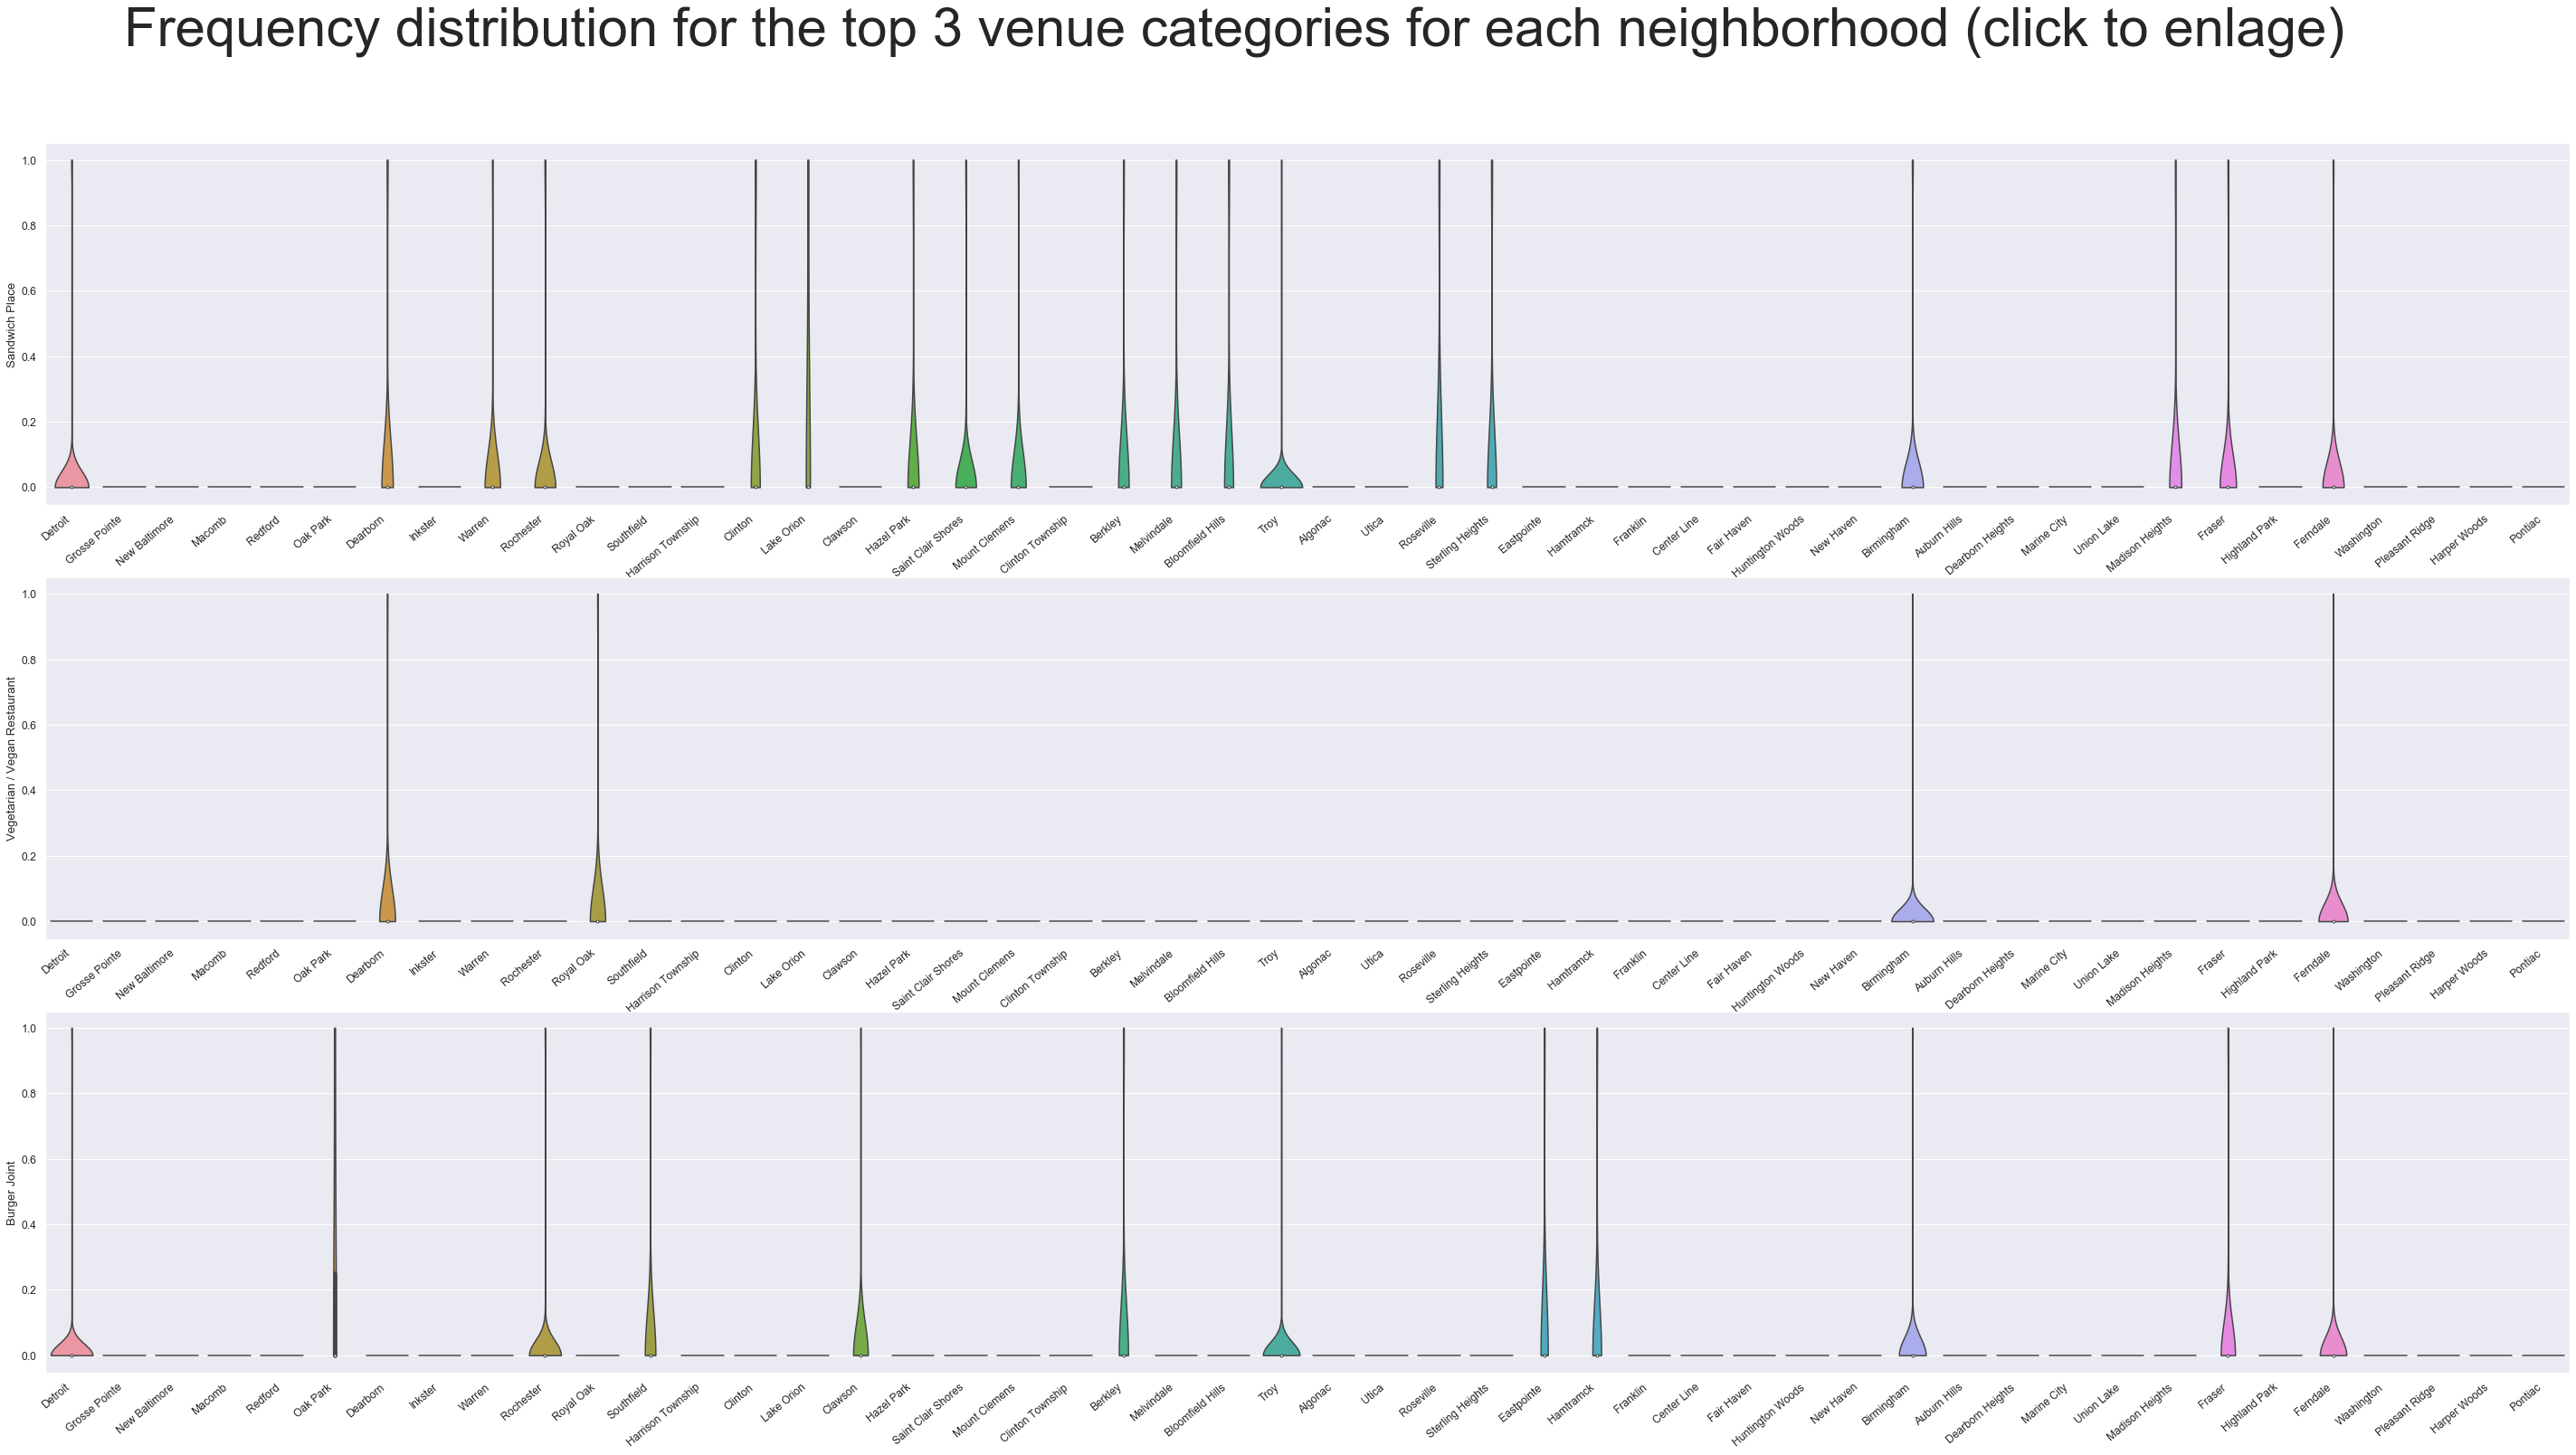

In [124]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Sandwich Place", data=mi_onehot, cut=0);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Vegetarian / Vegan Restaurant", data=mi_onehot, cut=0);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")

ax = plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Burger Joint", data=mi_onehot, cut=0);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")

ax.text(1.0, 4.0, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

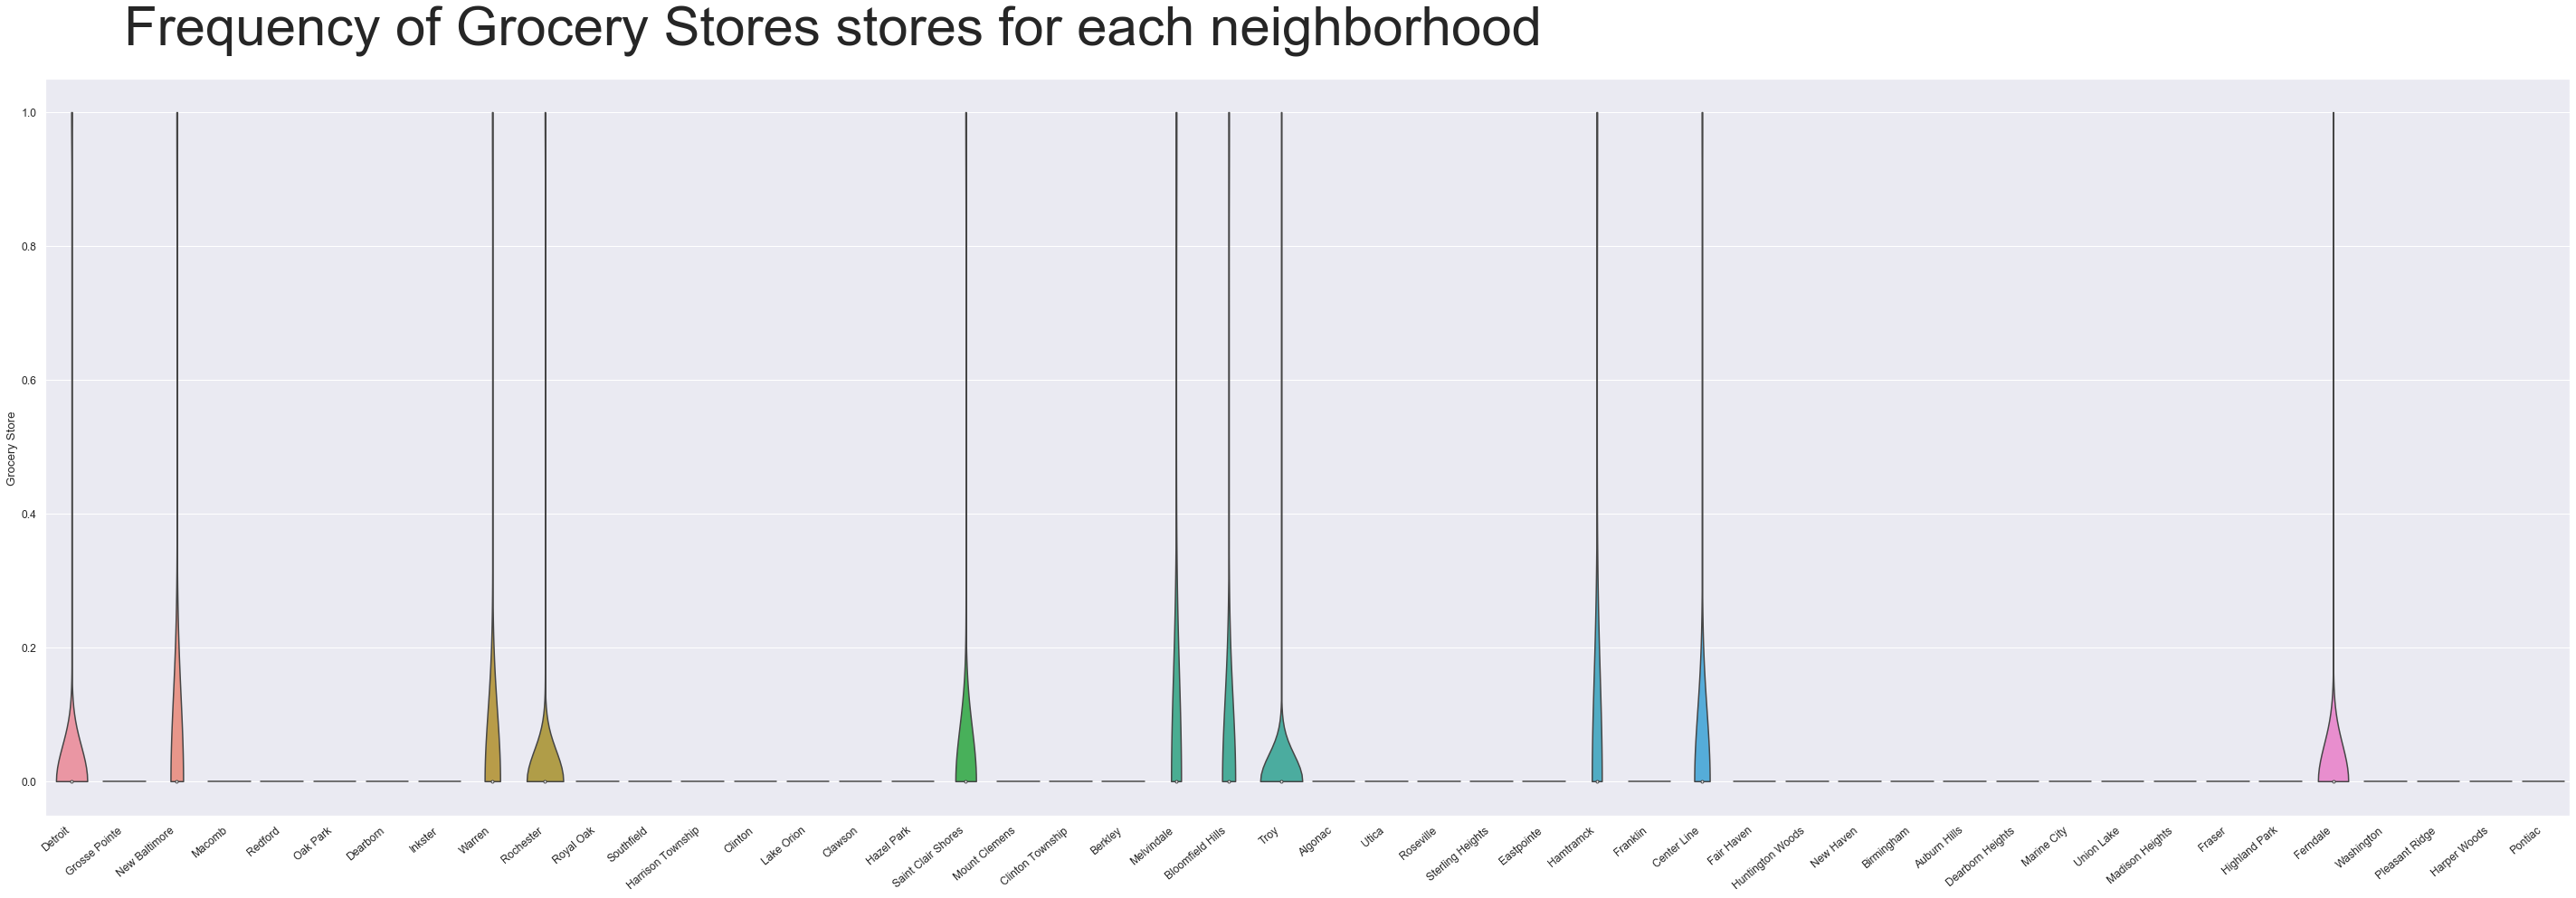

In [122]:
fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Grocery Store", data=mi_onehot, cut=0);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Grocery Stores stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

Chosen Neighborhoods - Results
==========================================================================================================================================================================================================================================================================================================

Analyzing the data and knowledge of the area, allow draw conclusion that 2 neighbourhoods from the list are most suitable.

Identifying neighbourhoods that has Burger Joints, Sandwich Shops and Vegan Food Places. Finding area with no Grocery Store into the mix is a significant bonus. Having no comeptiotion as a farm to fresh store is a bonus

So the final 2 prospective neighborhoods for new store locations are where criteria are met:

### - Birmingham
### - Ferndale



### Conclusion: By analyzing the dataset we can draw a conclusion that Birmingham and Ferndale are best the best locations to setup Farm to Fresh Store.